<a href="https://colab.research.google.com/github/NHymavathi/Hackthon-ml/blob/main/Spam_or_not_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 data = pd.read_csv("/content/spam_sms.csv")

In [ ]:
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.isnull().sum()

,0
v1,0
v2,0


In [ ]:
data.dtypes

,0
v1,object
v2,object


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop unnecessary columns (if any exist)
data = data.iloc[:, :2]  # Keep only first two columns
data.columns = ['label', 'message']  # Rename columns for clarity

# Convert 'spam' and 'ham' to binary values (1 for spam, 0 for ham)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Check dataset after processing
print(data.head())


v1    0
v2    0
dtype: int64
   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text messages into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit to 5000 features
X = vectorizer.fit_transform(data['message'])

# Target variable
y = data['label']


In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Removed *100

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text messages into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)  # Limit to 5000 features
X = vectorizer.fit_transform(data['message'])

# Target variable
y = data['label']

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.9479820627802691
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.63      0.77       150

    accuracy                           0.95      1115
   macro avg       0.96      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115



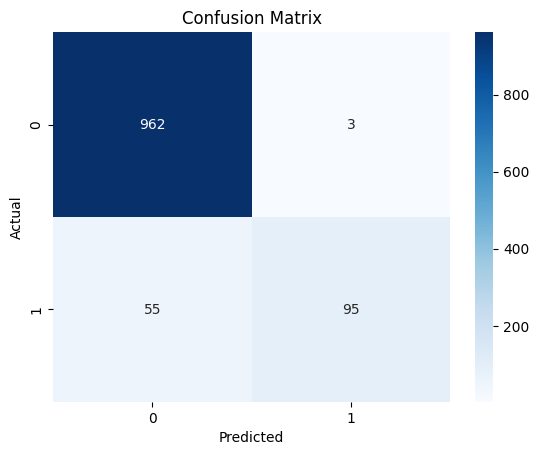

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()